#### [openCV - 이미지와 그리기 함수들]

- 객체 인식 시 객체 위치 지정용 사용됨

In [26]:
## 이미지 처리 모듈
import cv2
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [27]:
## 데이터 준비 : 도화지랑 이미지
img_file = '../Data/Image/lion_face.jpg'
paper_file = '../Data/Image/paper_w.jpg'
# img_file = '../Data/Image/flower_rainbow.jpg'


In [28]:
## 흰색 도화지 이미지 생성 및 저장
ret=cv2.imwrite(paper_file, np.full((500,500), 255, dtype = np.uint8))


In [29]:
## 흰색 도화지 이미지 데이터 & 사진 이미지 데이터 로딩
paper = cv2.imread(paper_file)
picture = cv2.imread(img_file)

print(f'[paper] : {paper.shape}, {paper.ndim}D')
print(f'[picture] : {picture.shape}, {picture.ndim}D')


[paper] : (500, 500, 3), 3D
[picture] : (475, 640, 3), 3D


[2] 그리기 관련 기능들 <hr>

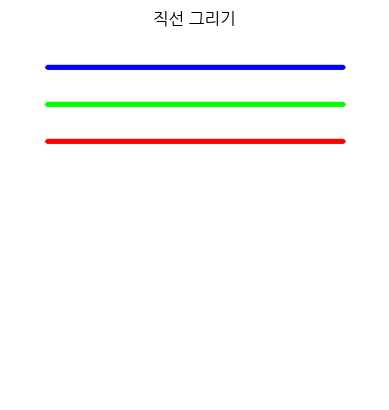

In [30]:
## [2-1] 직선 그리기
cv2.line(paper, (50,50), (450,50), (255,0,0), 5)          # 파란색
cv2.line(paper, (50,100), (450,100), (0,255,0), 5)        # 초록색
cv2.line(paper, (50,150), (450,150), (0,0,255), 5)        # 빨간색

## 시각화
plt.imshow(cv2.cvtColor(paper, cv2.COLOR_BGR2RGB))
plt.title('직선 그리기')
plt.axis('off')
plt.show()

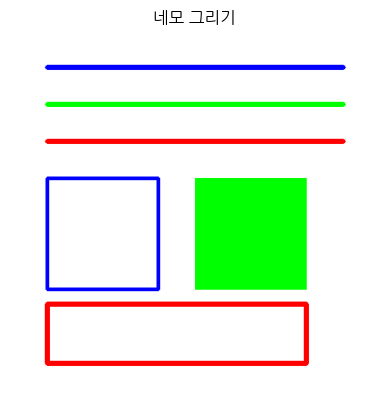

In [31]:
## [2-2] 네모 그리기
cv2.rectangle(paper, (50, 200), (200, 350), (255, 0, 0), 3)      # 파란색
cv2.rectangle(paper, (250, 200), (400, 350), (0, 255, 0), -1)    # 초록색 채움
cv2.rectangle(paper, (50, 370), (400, 450), (0, 0, 255), 5)      # 빨간색  
## 시각화
plt.imshow(cv2.cvtColor(paper, cv2.COLOR_BGR2RGB))
plt.title('네모 그리기')
plt.axis('off') 
plt.show()


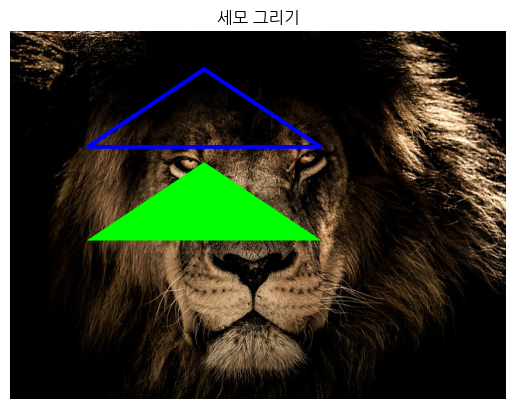

In [32]:
## [2-3] 세모 그리기
cv2.polylines(picture, [np.array([[250,50], [400,150], [100,150]], np.int32)], isClosed=True, color=(255,0,0), thickness=3)  # 파란색
cv2.fillPoly(picture, [np.array([[250,170], [400,270], [100,270]], np.int32)], color=(0,255,0))  # 초록색 채움
## 시각화
plt.imshow(cv2.cvtColor(picture, cv2.COLOR_BGR2RGB))
plt.title('세모 그리기')
plt.axis('off') 
plt.show()

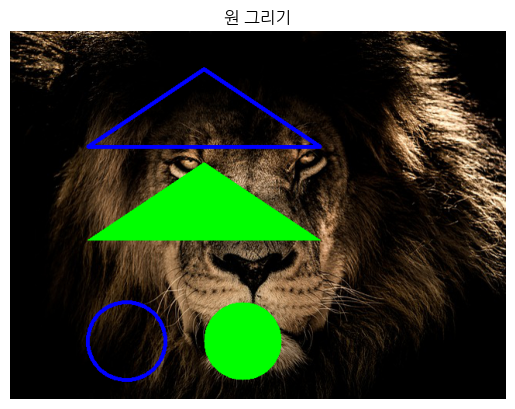

In [33]:
## [2-4] 원 그리기
cv2.circle(picture, (150,400), 50, (255,0,0), 3)     # 파란색
cv2.circle(picture, (300,400), 50, (0,255,0), -1)    # 초록색 채움
## 시각화
plt.imshow(cv2.cvtColor(picture, cv2.COLOR_BGR2RGB))    
plt.title('원 그리기')
plt.axis('off')
plt.show()

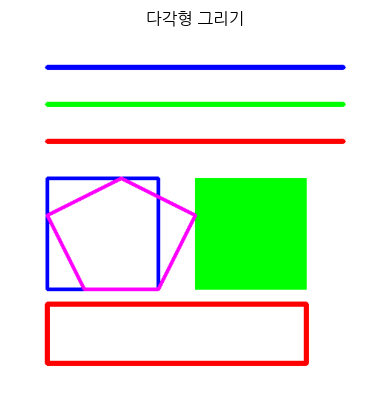

In [34]:
## 다각형 그리기
points = np.array([[50,250], [150,200], [250,250], [200,350], [100,350]], np.int32)
cv2.polylines(paper, [points], isClosed=True, color=(255,0,255), thickness=3)  # 보라색
## 시각화
plt.imshow(cv2.cvtColor(paper, cv2.COLOR_BGR2RGB))
plt.title('다각형 그리기')
plt.axis('off')
plt.show()


In [41]:
import cv2

# 1) 얼굴/눈 검출기 로드
face_cascade = cv2.CascadeClassifier("./haarcascade_frontalface_default.xml")
eye_cascade  = cv2.CascadeClassifier("./haarcascade_eye.xml")
# 안경 포함 눈 검출이 더 잘 되면 아래로 바꿔도 됨:
# eye_cascade = cv2.ㅂ("./haarcascade_eye_tree_eyeglasses.xml")

# 로드 확인 (파일 경로 틀리면 empty!)
if face_cascade.empty():
    raise FileNotFoundError("얼굴 XML을 못 찾았습니다: haarcascade_frontalface_default.xml")
if eye_cascade.empty():
    raise FileNotFoundError("눈 XML을 못 찾았습니다: haarcascade_eye.xml")

# 2) 웹캠 열기
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise RuntimeError("웹캠을 열 수 없습니다. (VideoCapture(0) 실패)")

while True:
    ret, frame = cap.read()
    if not ret:
        print("프레임을 읽지 못했습니다.")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # 3) 얼굴 검출
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(80, 80)
    )

    for (x, y, w, h) in faces:
        # 얼굴 박스
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame, "Face", (x, y - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

        # 4) 얼굴 영역(ROI) 안에서 눈 검출 (상단 60% 정도만)
        roi_gray = gray[y:y + int(h * 0.6), x:x + w]
        roi_color = frame[y:y + int(h * 0.6), x:x + w]

        eyes = eye_cascade.detectMultiScale(
            roi_gray,
            scaleFactor=1.1,
            minNeighbors=7,
            minSize=(20, 20)
        )

        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (255, 0, 0), 2)
            cv2.putText(roi_color, "Eye", (ex, ey - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    cv2.imshow("Face + Eye Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()
